# Kunskapskontroll 2 Del 1
## Modellera MNIST (Markus Tärning)

## Importerar nödvändiga bibliotek

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Modeller
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Laddar ned datat och gör en kort analys, EDA

In [59]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [92]:
#print(mnist.DESCR) # Beskrivning av datasetet

In [60]:
print(X.shape) # 70 000 bider med 28x28(784) pixlar
print(y.shape) # 70 000 siffror med de rätta svaren
print('X[0] ska vara en: ', y[0],':a') # Det ser ut att stämma enligt bilden nedan på ploten.

(70000, 784)
(70000,)
X[0] ska vara en:  5 :a


# Skapar en plot på första siffran(X[0]) i detta dataset som ska klassificeras.

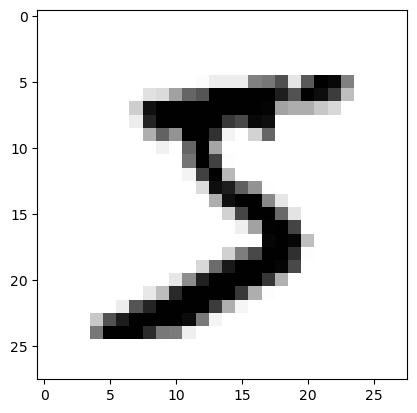

In [61]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

### Skapar en utskrift av samma siffra i gråskala där 0 betyder vit och 255 är helt svart

In [62]:
# Nedan ser vi varje pixel med tihörande värde.
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## Splittar datat i träning, validering och test

In [63]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

In [64]:
# Kollar samtliga delsets antal.
print('y_train:', '   ', y_train.size)
print('y_val:', '     ', y_val.size)
print('y_test:', '    ', y_test.size)
print('y_train_val:', y_train_val.size)

y_train:     50000
y_val:       10000
y_test:      10000
y_train_val: 60000


## Skapar 2 modeller

### Modell 1. RandomForestClassifier

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit on X_train
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

#### Instansierar modellen

In [66]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)

In [67]:
rf_clf.fit(X_train, y_train) # Kör modellen

RandomForestClassifier(n_jobs=1, random_state=42)

#### Utvärderar modellen på valideringsdata

In [16]:
rf_clf.score(X_val, y_val)

0.9692

In [68]:
y_pred = rf_clf.predict(X_val)
print("Klassificeringsrapport för Random Forest:")
print(classification_report(y_val, y_pred))

Klassificeringsrapport för Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       997
           1       0.99      0.98      0.98      1158
           2       0.96      0.97      0.97      1007
           3       0.97      0.95      0.96      1028
           4       0.97      0.97      0.97       966
           5       0.95      0.96      0.96       885
           6       0.98      0.98      0.98       945
           7       0.97      0.97      0.97      1070
           8       0.97      0.95      0.96       988
           9       0.95      0.96      0.96       956

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Modell 2 KNeighborsClassifier

#### Skalar data för modellen KNeighborsClassifier

In [69]:
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=1)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=3)

#### Utvärdering på valideringsdata

In [70]:
print("accuracy score:")
knn_clf.score(X_val_scaled, y_val)

accuracy score:


0.9449

### Utvärderar bästa modellen: RandomForestClassifier genom att först fitta modellen på både träning och validerings-datat.

In [71]:
rf_clf.fit(X_train_val, y_train_val)

RandomForestClassifier(n_jobs=1, random_state=42)

In [72]:
print("accuracy score:")
rf_clf.score(X_test, y_test)

accuracy score:


0.9674

### För att få en bättre försåelse hur modellen presterar så använder jag en ConfunsionMatrix

In [73]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

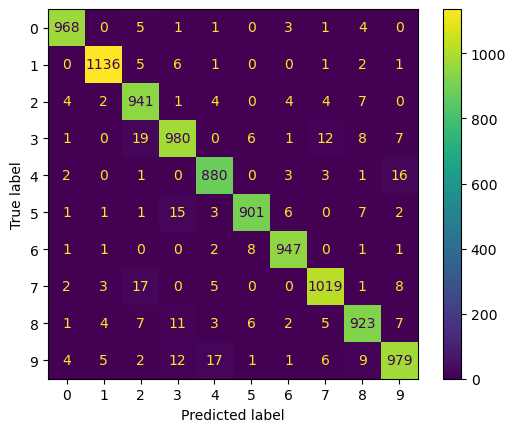

In [74]:
y_pred = rf_clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)

### Nedan försöker jag tydligöra för mig själv hur modellen presterar

In [75]:
# Antal förekomster av varje klass i testsetet
unique_true, counts_true = np.unique(y_test, return_counts=True)
class_counts = dict(zip(unique_true, counts_true))

# Skriv ut antalet för varje klass
for digit, count in class_counts.items():
    print(f"Siffra {digit}: {count} förekomster")

Siffra 0: 983 förekomster
Siffra 1: 1152 förekomster
Siffra 2: 967 förekomster
Siffra 3: 1034 förekomster
Siffra 4: 906 förekomster
Siffra 5: 937 förekomster
Siffra 6: 961 förekomster
Siffra 7: 1055 förekomster
Siffra 8: 969 förekomster
Siffra 9: 1036 förekomster


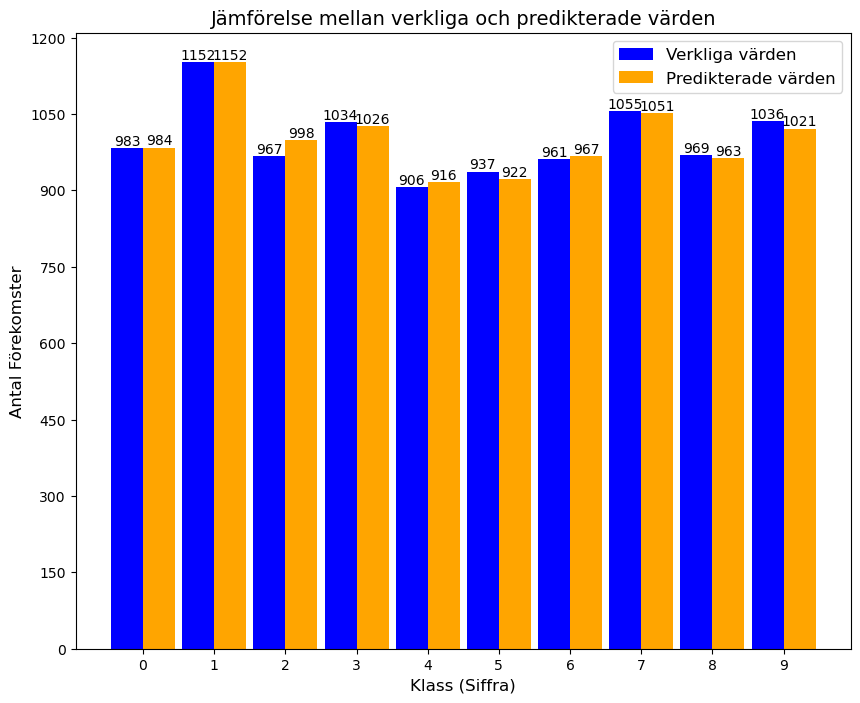

In [91]:
classes = np.arange(10)  # Klasserna 0–9

# Beräkna antal förekomster för varje klass
true_counts = Counter(y_test)
pred_counts = Counter(y_pred)

# Omvandla till DataFrame för bättre översikt
comparison = pd.DataFrame({
    'Verkliga värden': [true_counts.get(c, 0) for c in classes],
    'Predikterade värden': [pred_counts.get(c, 0) for c in classes]
}, index=classes)

# Skapa stapeldiagram
x = comparison.index  # Klasser (0-9)
width = 0.45  # Bredden på staplarna

fig, ax = plt.subplots(figsize=(10, 8))
ax.autoscale()

# Lägg till staplar för verkliga värden och predikterade värden
bars_true = ax.bar(x - width/2, comparison['Verkliga värden'], width, label='Verkliga värden', color='blue')
bars_pred = ax.bar(x + width/2, comparison['Predikterade värden'], width, label='Predikterade värden', color='orange')

# Lägg till värden ovanför varje stapel
for bar in bars_true:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, str(height), ha='center', va='bottom', fontsize=10)

for bar in bars_pred:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, str(height), ha='center', va='bottom', fontsize=10)

# Anpassa diagrammet
ax.set_xlabel('Klass (Siffra)', fontsize=12)
ax.set_ylabel('Antal Förekomster', fontsize=12)
ax.set_title('Jämförelse mellan verkliga och predikterade värden', fontsize=14)
ax.set_xticks(x)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Visa endast heltal på y-axeln
ax.legend(fontsize=12, loc='upper right')

# Sammanfattning
- RandomForestClassifier var den bättre modellen i detta arbete. Modell klassifiserar rätt med ca: 96,7% på otränad data(X_test)
- Ska bli spännande att se hur NN-modeller kommer prestera på liknande dataset framöver ;-)